<a href="https://colab.research.google.com/github/Daniil-Khlyvniuk/python_math/blob/main/1_Have_fun_with_differential_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задача

В сосуд, имеющий форму прямого кругового цилиндра, налита жидкость, например вода.
Сосуд вращается с постоянной угловой скоростью `w` относительно оси цилиндра. Требуется определить, какую форму примет поверхность жидкости, если вращение продолжается достаточно долго**!. При построении модели мы будем предполагать, что сосуд достаточно широкий и глубокий, это позволит пренебречь разными поверхностными эффектами около боковых стенок сосуда.

** `Достаточно долго` понимается здесь в том смысле, что вся жидкость в сосуде должна прийти в стационарное состояние относительно самого сосуда, т. е. каждый элементарный ее объем будет совершать только общее вращатель-ное движение с заданной угловой скоростью `w`.

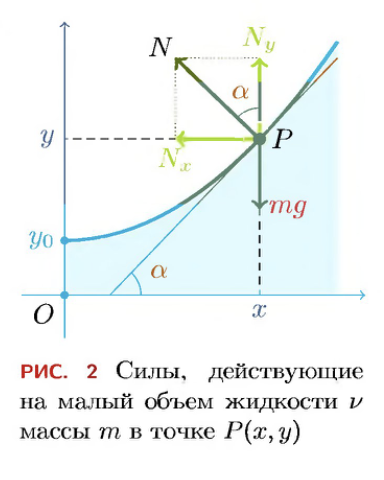


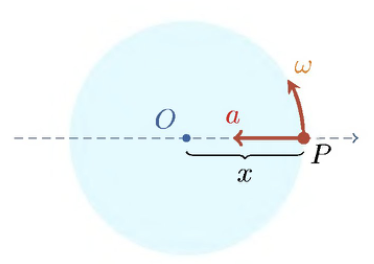

In [21]:
from sympy import *
from IPython.display import display

In [4]:
x, omega, y0, C1 = symbols("x omega y0 C1")
g = symbols("g", positive=True)

display(x, omega, y0, C1, g)

x

omega

y0

C1

g

Наше дифференциальное уравнение является простейшим, это значит, что оно решается непосредственным интегрированием его правой части.
Следовательно, для решения этого уравнения с помощью библиотеки `SymPy` нам достаточно определить только его правую часть, а не все уравнение целиком

In [6]:
ode_rhs = omega ** 2 * x / g

display(ode_rhs)

omega**2*x/g

Общее решение простейшего дифференциального уравнения `у = f(x)` - это неопределенный `интеграл` от правой части `f(х)` этого уравнения.

In [9]:
dsol = integrate(ode_rhs, x) + C1

display(dsolve)

C1 + omega**2*x**2/(2*g)

Стандартный способ определения константы интегрирования `С1` в общем решении дифференциаль-ного уравнения из начального условия заключается в подстановке в это решение величин из начального условия, что приводит к алгебраическому уравнению для переменной `С1`. Решив это уравнение и подставив найденное решение вместо `С1` обратно в формулу общего решения, мы найдем решение соответствующей начальной задачи для заданного дифференциального уравнения.

In [10]:
eq1 = Eq(dsol. subs(x, 0), y0)

display(eq1)

Eq(C1, y0)

Следующим шагом решаем построенное уравнение с помощью команды

In [12]:
sol1 = solveset(eq1, C1)
C2 = tuple(sol1)[0]

display(sol1, C2)

{y0}

y0

Последним действием подставляем найденное зна-чение `С2` вместо символа `С1` в общее решение `dsol`, что и дает нам искомое решение начальной задачи.

In [14]:
dsol_y0 = dsol.subs(C1, C2)

display(dsol_y0)

y0 + omega**2*x**2/(2*g)

Как видно из последней формулы, найденная за-висимость высоты `у` поверхности жидкости от рассто-яния до оси вращения `x` оказывается квадратичной, т.е. интегральные кривые (графики решений диффе-ренциального уравнения) должны быть параболами.

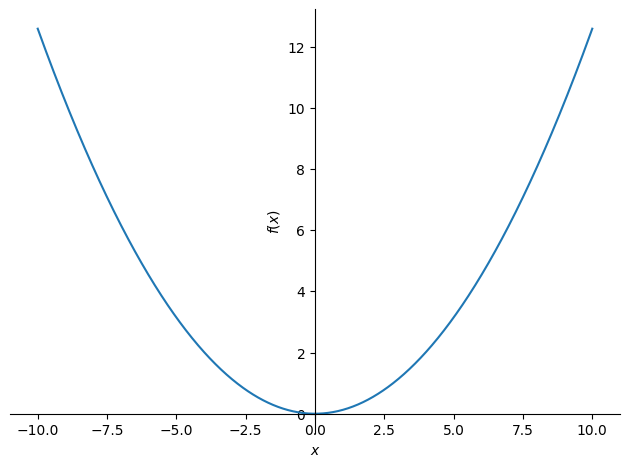

In [17]:
ds = dsol_y0.subs({ y0: 0, omega: pi/2, g: 9.8 })
p1 = plot(ds)

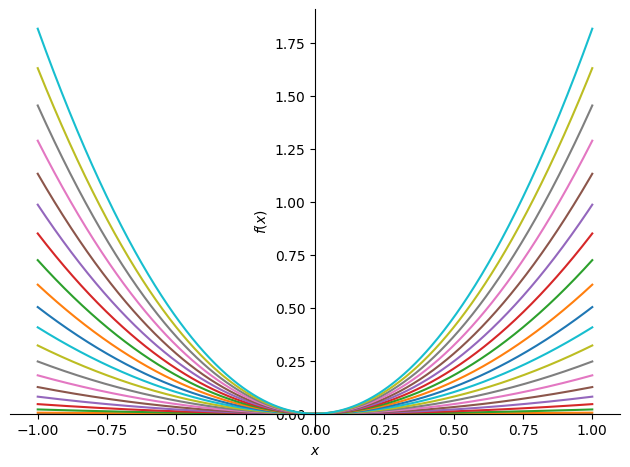

In [20]:
from numpy import arange

p2 = plot(show=False)

for om in arange(0, (2 * pi), (pi / 10)):
  ds = dsol_y0.subs({ y0: 0, omega: om, g: 9.8 })
  p = plot(ds, (x, -1, 1), show=False)
  p2.extend(p)

p2.show()